# スマートフォンのバッテリー容量の仮説検定

## 2年間使われた端末500台について、新品当時と2年後の連続待受時間を調査したデータを用いて「2年間で1割程度しか減少しない」という説が正しかったかを仮説検定する

### ※新品の待受時間を200時間として販売していたので、1割減少したとすると待受時間は180時間、減少量は20時間となる

## ⚫︎帰無仮説:2年間で1割程度しか減少しない（newとyear2の差が20時間以下）
## ⚫︎対立仮説：2年間で1割以上減少する（newとyear2の差が20時間超）

### 必要なライブラリの読み込みから統計量の確認まで

In [44]:
# 必要なライブラリのimport
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

In [45]:
dataset = pd.read_csv("./batteries_hours.csv")

In [46]:
dataset.head()

,new,year2
0,200.614633,181.027960
1,199.716863,164.124190
2,205.733141,171.638352
3,193.768958,174.801830
4,206.248877,198.362352


In [47]:
dataset.describe()

,new,year2
count,500.000000,500.000000
mean,200.474637,176.402151
std,4.794669,8.291210
min,184.437132,156.141821
25%,196.886113,170.442397
50%,200.492489,176.108870
75%,203.582387,182.191932
max,216.199636,198.849765


### new と year2 両方のヒストグラムと分布を表示するグラフを作成

<function matplotlib.pyplot.show(close=None, block=None)>

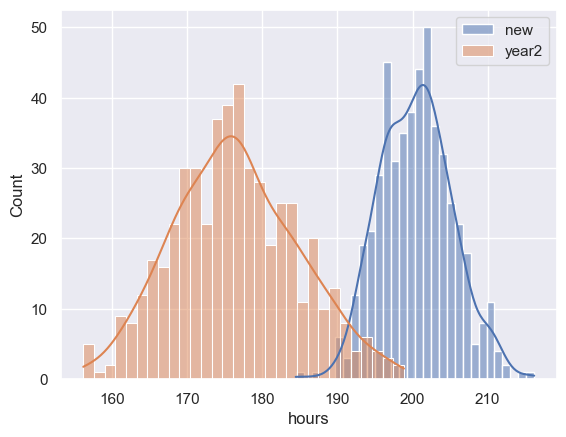

In [48]:
sns.histplot(dataset['new'], bins=30, kde=True, label='new')
sns.histplot(dataset['year2'], bins=30, kde=True, label='year2')

plt.legend()
plt.xlabel('hours')
plt.show

## new と year2 それぞれについて母平均の推定値と95%信頼区間の下限値と上限値を計算


In [49]:
#'new'と'year2'に分ける
data_new = dataset['new']
data_year2 = dataset['year2']

In [50]:
#'new'の母平均の点推定
mu_new = np.mean(data_new)
mu_new

np.float64(200.4746372262155)

In [51]:
#'new'の母分散の点推定
sigma_new = np.var(data_new, ddof=1)
sigma_new

np.float64(22.988848478054507)

In [52]:
#'new'の標準誤差（SE)の計算
se_new = sigma_new/np.sqrt(len(data_new))
se_new

np.float64(1.0280925584274492)

In [53]:
#'new'の95％信頼区間の下限値と上限値の計算
df_new = len(data_new)-1
interval_new = stats.t.interval(0.95, df_new, loc=mu_new, scale=se_new)
interval_new

(np.float64(198.45471356001738), np.float64(202.4945608924136))

In [54]:
#'year2'の母平均の点推定
mu_year2 = np.mean(data_year2)
mu_year2

np.float64(176.40215071111032)

In [55]:
#'year2'の母分散の点推定
sigma_year2 = np.var(data_year2, ddof=1)
sigma_year2

np.float64(68.74415625640519)

In [56]:
#'year2'の標準誤差（SE)の計算
se_year2 = sigma_year2/np.sqrt(len(data_year2))
se_year2

np.float64(3.074332128903789)

In [57]:
#'year2'の95％信頼区間の下限値と上限値の計算
df_year2 = len(data_year2)-1
interval_year2 = stats.t.interval(0.95, df_year2, loc=mu_year2, scale=se_year2)
interval_year2

(np.float64(170.36192001979538), np.float64(182.44238140242527))

## new と year2 の時間の差の抽出からヒストグラムの描写

In [58]:
#2変数の差を計算
dataset['Difference'] = dataset['new'] - dataset['year2']
dataset.head()

,new,year2,Difference
0,200.614633,181.027960,19.586673
1,199.716863,164.124190,35.592673
2,205.733141,171.638352,34.094789
3,193.768958,174.801830,18.967128
4,206.248877,198.362352,7.886525


In [ ]:
dataset.describe()

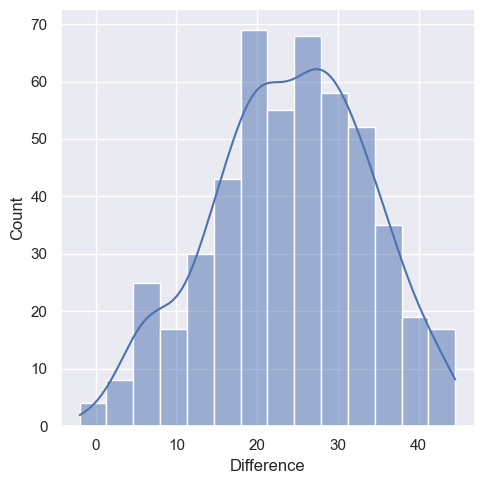

In [59]:
#ヒストグラムの描写
sns.displot(dataset['Difference'], kde=True)

## 時間差を使い、t検定の実施

In [61]:
stats.ttest_1samp(dataset['Difference'],20, alternative='greater')

TtestResult(statistic=np.float64(9.465273816769793), pvalue=np.float64(5.79733125646464e-20), df=np.int64(499))

## Differenceが20以下であることを証明するため、片側１標本のt検定を行った。その結果p<0.001となり帰無仮説は棄却された。

In [65]:
dataset.describe()

,new,year2,Difference
count,500.000000,500.000000,500.000000
mean,200.474637,176.402151,24.072487
std,4.794669,8.291210,9.620806
min,184.437132,156.141821,-1.976679
25%,196.886113,170.442397,17.817902
50%,200.492489,176.108870,24.535223
75%,203.582387,182.191932,31.074060
max,216.199636,198.849765,44.536423
